In [1]:
# plot of liquity 
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
import scipy 
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.widgets import Slider
import seaborn as sns
import numpy as np 
import random
import pandas as pd 
from ipywidgets import *
from scipy.stats import norm

#Import simulation function and class 
%run rbpool_env_v3.ipynb

In [2]:
path = './input/BTC-USD.csv'
btc_hist = pd.read_csv(path)
btc_hist['_date'] = btc_hist.Date.apply(pd.to_datetime)
# single_path = './Simulation_check.csv'
# _df = pd.read_csv(single_path) 
# _df.head()

In [ ]:
def sim_summary(df, cols, plot, label=''):
    _df = df[cols]
    #MA.groupby('ma_window').describe().unstack(1)
    A = _df.groupby(cols[1])[cols[0]].describe()
    b= _df.groupby(cols[1])[cols[0]].skew()
    b.name = 'skew'
    c = _df.groupby(cols[1])[cols[0]].apply(pd.DataFrame.kurt)
    c.name = 'kurt'
    if plot==1: 
        plot_boxplt(df, cols, label)
    elif plot==2:
        plot_errbar(df, cols, label)
    elif plot==2:
        plot_errbar(df, cols, lab
    return pd.concat([A,b,c], axis=1)


In [36]:
SM.head()

,Unnamed: 0,final_pv,pv_minus_bnh,pool_value_nostop,buy_n_hold,wt_convert,wt_final,bnh_default,time_to_convert,stop_loss_flag,time_to_liquid,liquid_loss,liquid_pv,ltv,stop_limit,real_vol,grp,log_final_pv,log_liquid_pv
0,0,9.691660e+06,-176675.737003,9.691660e+06,9.868336e+06,0.992348,0.992348,0.0,-1.0,0.0,-1.0,0.0,9.868336e+06,8560000.0,0.8,0.25,0.8-0.25,6.986398,6.994244
1,1,1.028702e+07,-83630.809697,1.028702e+07,1.037065e+07,0.992564,0.992564,0.0,-1.0,0.0,-1.0,0.0,1.037065e+07,8560000.0,0.8,0.25,0.8-0.25,7.012290,7.015806
2,2,9.016030e+06,-171188.944829,9.016030e+06,9.187219e+06,0.988637,0.988637,0.0,-1.0,0.0,-1.0,0.0,9.187219e+06,8560000.0,0.8,0.25,0.8-0.25,6.955015,6.963184
3,3,8.534878e+06,23694.979317,8.499798e+06,8.511183e+06,0.982822,1.000000,0.0,79.0,1.0,80.0,1.0,8.539013e+05,8560000.0,0.8,0.25,0.8-0.25,6.931197,5.931408
4,4,1.048847e+07,-486456.840191,1.048847e+07,1.097493e+07,0.995247,0.995247,0.0,-1.0,0.0,-1.0,0.0,1.097493e+07,8560000.0,0.8,0.25,0.8-0.25,7.020712,7.040402


C:\Users\jings\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


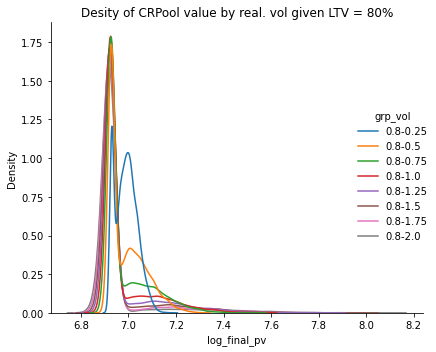

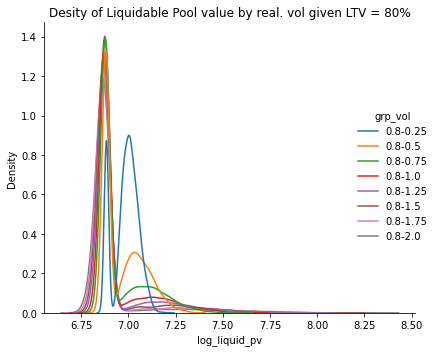

In [112]:
sim_name = 'SM_flat_50init'
SM = pd.read_csv('{}.csv'.format(sim_name))
SM.describe()
SM['grp_vol'] = SM['ltv'].astype(str) + '-'+ SM['real_vol'].astype(str)
# SM.head()
SM['log_final_pv'] = np.log10(SM['final_pv'])
SM['log_liquid_pv'] = np.log10(SM['liquid_pv'])
SM['final_pv_bnh_ratio'] = np.log10(SM['final_pv']/SM['buy_n_hold'])
SM['liquid_pv_bnh_ratio'] = np.log10(SM['liquid_pv']/SM['buy_n_hold'])
SM[SM['ltv']==0.75]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

fig1 = sns.displot(SM[SM['ltv']==0.80], x="log_final_pv", hue="grp_vol", kind="kde", fill=False)
plt.title("Desity of CRPool value by real. vol given LTV = 80%")
plt.tight_layout()
plt.savefig('CRP_value_{}_{}.png'.format(sim_name, 'ltv80'))
# sns.displot(SM[SM['stop_limit']==0.75], x="log_final_pv", hue="grp", kind="kde", fill=False)
# sns.displot(SM[SM['stop_limit']==0.8], x="log_final_pv", hue="grp", kind="kde", fill=False)
fig2 = sns.displot(SM[SM['ltv']==0.80], x="log_liquid_pv", hue="grp_vol", kind="kde", fill=False, ax=ax2)
plt.title("Desity of Liquidable Pool value by real. vol given LTV = 80%")
plt.tight_layout()
plt.savefig('avve_like_{}_{}.png'.format(sim_name, 'ltv80'))

# sns.displot(SM[SM['stop_limit']==0.75], x="log_liquid_pv", hue="grp", kind="kde", fill=False)
# sns.displot(SM[SM['stop_limit']==0.8], x="log_liquid_pv", hue="grp", kind="kde", fill=False)

# ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# # ax.set_title('Histogram of pool-value (stop-loss at 8.4M ) and buy&hold - real.vol set to 100% 

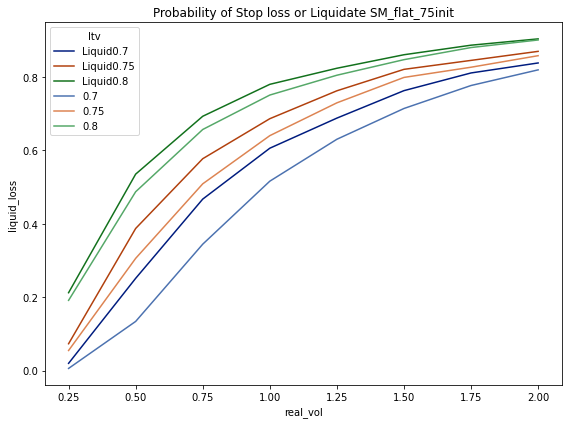

In [107]:
cols = ['stop_loss_flag', ['ltv', 'liquid_ltv', 'real_vol']]
df = SM
df['liquid_ltv'] = 'Liquid'+ df['ltv'].astype(str)

_mean = df.groupby(cols[1]).mean().reset_index()
_mean['final_pv_bnh'] = _mean['final_pv']/ _mean['buy_n_hold']
_mean['liquid_bnh'] = _mean['liquid_pv']/_mean['buy_n_hold']
_mean
fig, ax = plt.subplots(figsize=(8,6))


sns.lineplot(x='real_vol', 
             y='liquid_loss',
             hue='liquid_ltv', 
             palette = 'dark',
             data=_mean)

sns.lineplot(x='real_vol', 
             y='stop_loss_flag',
             hue='ltv', 
             palette = 'deep',
             data=_mean)

plt.title("Probability of Stop loss or Liquidate {}".format(sim_name))
plt.tight_layout()
plt.savefig('Prob_stop {}.png'.format(sim_name))

plt.show()


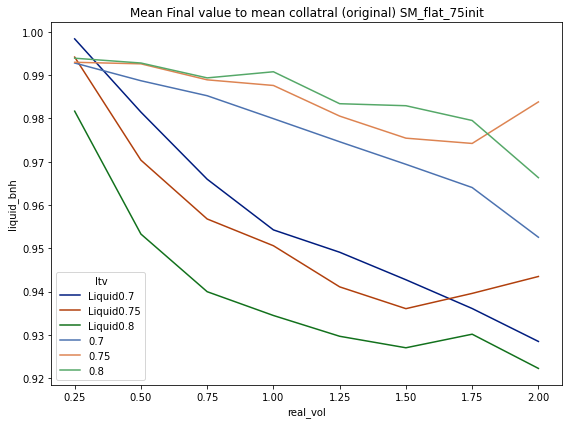

In [108]:
_mean = df.groupby(cols[1]).mean().reset_index()
_mean['final_pv_bnh'] = _mean['final_pv']/ _mean['buy_n_hold']
_mean['liquid_bnh'] = _mean['liquid_pv']/_mean['buy_n_hold']
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x='real_vol', 
             y='liquid_bnh',
             hue='liquid_ltv', 
             palette = 'dark',
             data=_mean)

sns.lineplot(x='real_vol', 
             y='final_pv_bnh',
             hue='ltv', 
             palette = 'deep',
             data=_mean)

plt.title("Mean Final value to mean collatral (original) {}".format(sim_name))
plt.tight_layout()
plt.savefig('Mean_insolvent_pct_{}.png'.format(sim_name))

plt.show()


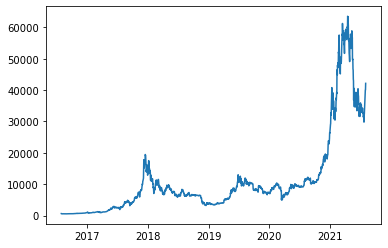

In [3]:
%matplotlib inline
plt.plot(btc_hist._date, btc_hist.Open)
plt.show()
#btc_hist.Open.plot()

In [11]:
start_date = '2021-01-01'
end_date = '2021-03-31'
_btc = btc_hist[btc_hist.Date.between(start_date, end_date)]
_btc_price = _btc.Open.values
_btc_price.shape[0]

90

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.314
Model:                            OLS   Adj. R-squared (uncentered):              0.307
Method:                 Least Squares   F-statistic:                              41.73
Date:                Sun, 08 Aug 2021   Prob (F-statistic):                    5.06e-09
Time:                        10:10:01   Log-Likelihood:                         -43.035
No. Observations:                  92   AIC:                                      88.07
Df Residuals:                      91   BIC:                                      90.59
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\jings\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Time to maturity (in year)')

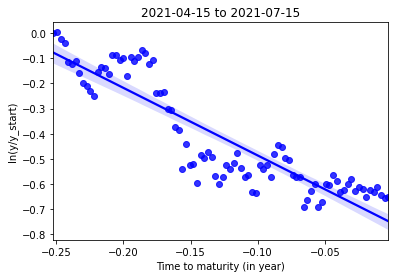

In [4]:
# check on BTC actual price growth trend and volatility 

import statsmodels.api as statm
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
%matplotlib inline 

#define response variable
start_date = '2021-04-15'
end_date='2021-07-15'
market = '{}_{}'.format(start_date, end_date)
_btc = btc_hist[btc_hist.Date.between(start_date, end_date)]
y = _btc.Open.values
t = -np.linspace(y.shape[0],0,y.shape[0]+1)/365
t = t[:-1]
logy = np.log(y)
logy = logy-logy[0]
logy.shape
t.shape
###fit linear regression model
model = statm.OLS(logy, t).fit()
model.summary()
# fit your model which you have already done
# now generate predictions
logypred = model.predict(logy)
## calc rmse
rmse = rmse(logy, logypred)
print(model.summary(), rmse)
ax = sns.regplot(t,logy, color ='blue')
ax.set_title("{} to {}".format(start_date, end_date))
ax.set_ylabel("ln(y/y_start)")
ax.set_xlabel("Time to maturity (in year)")


In [5]:
def dynamic_plot(start_date, end_date):
    df_plot = ltv_simulation_path(1, 'SM', 0.95)
    d = df_plot.index.values
    y = df_plot.y_price.values
    x,y =[],[]
    def animate_line(i):
        d = df_plot.index.values
        y = df_plot.y_price.values
        line.set_data(d[:i],y[:i])
        return line

    lst1 = df_plot['x_locked']
    lst2 = df_plot['y_price']*df_plot['y_locked']
    b1, b2 = [], []
    def animate_bar(i):
        lst1 = df_plot['x_locked']
        lst2 = df_plot['y_price']*df_plot['y_locked']
        y1=lst1[i]
        y2=lst2[i]
        ax2.clear() 
        ax2.set_title('Total Pool Value')
        ax2.set_xlabel('Collateral Rebalancing Pool')
        ax2.set_ylim(0,2e7)
        ax2.bar(['USD', 'BTC'], [y1, y2], color =['green', 'yellow'])

    def updateAll(i):
        a = animate_line(i)
        b = animate_bar(i)
        return a,b

    %matplotlib notebook    
    import matplotlib.animation as ani
    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(1,2,1, xlim = (0, 92), ylim=(0, 130000))
    line, = ax1.plot([],[])
    ax1.set_ylabel('USD')
    ax1.set_xlabel('Day')
    ax1.set_title('BTC Price from {} to {}'.format(start_date, end_date))
    ax2 = fig.add_subplot(1,2,2)

    ax2.set_ylim(0,2e7)
    ax2.set_title('Total Pool Value')
    ax2.set_xlabel('total pool value')
    bar = ax2.bar(['USD', 'BTC'],[0, 0], color=['green', 'yellow'])
    animator = ani.FuncAnimation(fig, updateAll, interval=100, blit=False, repeat_delay = 12000)
    fig.tight_layout()
    plt.show()
    return animator 



%matplotlib notebook    
%matplotlib notebook    
start_date = '2020-06-01'
end_date='2020-08-31'
market = '{}_{}'.format(start_date, end_date)
_btc = btc_hist[btc_hist.Date.between(start_date, end_date)]
price_source = _btc.Open.values

Real_vol = 0.75
Growth_rate = 0
LTV0 = 0.8
bs_vol = 0.75
Collateral = 10000000
pool_init_x = 5000000 
y_price_init = price_source[0]
pool_init_y = 5000000/y_price_init
pool_init_wx = 0.5
fee_rate = 0.0
rebate=0
set_random_seed = False  
t = np.linspace(price_source.shape[0],0,price_source.shape[0]+1)/365
ltv_simulation_path(1, 'SM', 0.95)
animator = dynamic_plot(start_date, end_date)
plt.show()
# f = r'animation_{}_{}_rebate.gif'.format(start_date, end_date)
# import matplotlib.animation as animation
# writergif = animation.PillowWriter(fps=100) 
# animator.save(f, writer=writergif)


<IPython.core.display.Javascript object>

In [4]:
set_random_seed = False
np.random.seed(301)
s=1000
t =  np.linspace(91,0,92)/365
Growth_rate = 0
fee_rate = 0.00
rebate = 0
# Real_vol = 0.75
# bs_vol = 0.75
pool_init_wx = 0.5
fee_rate = 0.0
factor = 0.95
LTV0 = 0.80
cha_var = 'real_vol'
for gr in np.arange(-2, 2.01, 0.2):
    print(gr)
    Growth_rate = gr
    k = 0 
    for i in np.arange(0.25,2.01,0.25):
        k += 1
        Real_vol, bs_vol = i,i
        _sm = pd.DataFrame(ltv_corr(s, 'SM', factor))
        _sm[cha_var] = '{:.2f}'.format(i)
        if k == 1:
            SM = _sm
        else:
            SM = pd.concat([SM, _sm])
    SM.columns = ['corr_90', 'corr_price_pos', 'corr_price_neg', cha_var]
    A = sim_summary(SM, ['corr_90', cha_var], plot=0)
    A['variable']= 'corr_90'
    B = sim_summary(SM, ['corr_price_pos', cha_var], plot=0)
    B['variable']= 'corr_price_pos'
    C = sim_summary(SM, ['corr_price_neg', cha_var], plot=0)
    C['variable']= 'corr_price_neg'
    
    sim_output = pd.concat([A,B,C]).reset_index().set_index('variable')
    sim_output.to_csv('corr_vol_{}.csv'.format(round(gr*100)))


-2.0
-1.8
-1.6
-1.4000000000000001
-1.2000000000000002
-1.0000000000000002
-0.8000000000000003
-0.6000000000000003
-0.40000000000000036
-0.2000000000000004
-4.440892098500626e-16
0.1999999999999993
0.39999999999999947
0.5999999999999996
0.7999999999999994
0.9999999999999991
1.1999999999999993
1.3999999999999995
1.5999999999999992
1.799999999999999
1.9999999999999991


In [3]:

import pandas as pd
import sys
import os
file_list = ['corr_vol_{}.csv'.format(round(gr*100)) for gr in  np.arange(-2, 2.01, 0.2)]
file_list1 =[round(int(x.split('.')[0].split('_')[-1])/20)/5 for x in file_list]
file_list1
writer = pd.ExcelWriter('Simulation_corr_vol.xlsx') # Arbitrary output name
_i =0
for csvfilename in file_list:
    df = pd.read_csv(csvfilename)
    df['gr'] =file_list1[_i]
    df.to_excel(writer,sheet_name=file_list[_i])
    _i+=1
writer.save()   

corr_90
corr_price_pos
corr_price_neg


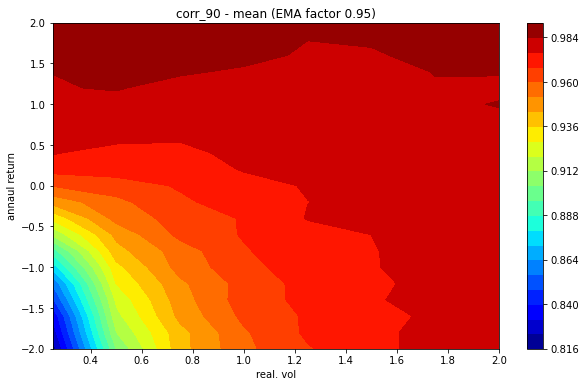

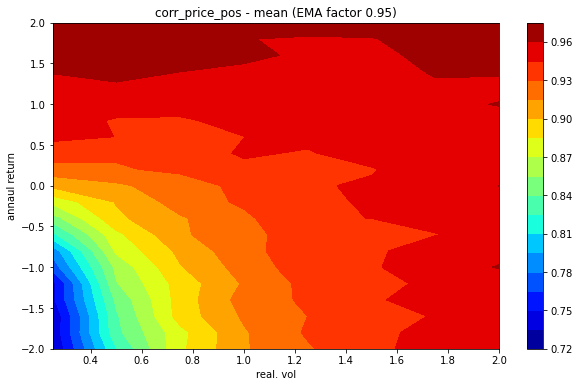

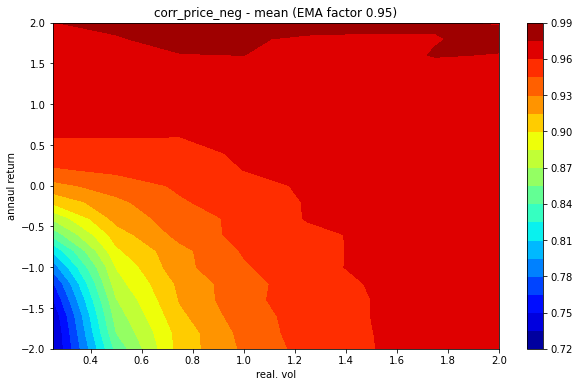

In [6]:

import matplotlib.backends.backend_pdf
from matplotlib import cm
sheet_to_df_map = pd.read_excel('./Simulation_corr_vol.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
mdf.head()
pdf = matplotlib.backends.backend_pdf.PdfPages("corr_vol.pdf")

for _var in ['corr_90', 'corr_price_pos', 'corr_price_neg']:
    print(_var)
    _df1 = mdf.loc[mdf.variable == _var].reset_index()
    _df1.head()
    #_df2 = mdf.loc[mdf.variable == 'BuynHold'].reset_index()

    vol_list = _df1['real_vol'].unique()
    gr_list = _df1['gr'].unique()
    _df1

    X,Y = np.meshgrid(vol_list,gr_list)
    zp = np.ndarray((vol_list.shape[0],gr_list.shape[0]))
    zp
    for tag in ['mean']:
        for x in range(0, len(vol_list)):
            for y in range(0, len(gr_list)):
                zp[x][y] = _df1.loc[(_df1.real_vol ==vol_list[x]) & (_df1.gr==gr_list[y])][tag]
        zp
        Z = zp.T

        #plt.figure(figsize=(14, 10))
        fig, axs = plt.subplots(1,1,figsize=(10,6))
        sp = axs.contourf(X, Y, Z, 20, cmap = 'jet')
        axs.set_xlabel('real. vol')
        axs.set_ylabel('annaul return')
        axs.set_title('{} - {} (EMA factor 0.95)'.format(_var, tag))
        fig.colorbar(sp)
        #plt.savefig('./{}_{}.png'.format(_var, tag))
        pdf.savefig(fig)
        
pdf.close()

In [3]:

#file_list= ['SM_factor_{}_down.csv'.format(int(i*100)) for i in [0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1]]
file_list = ['SM_ltv_vol_{}.csv'.format(round(LTV0*100)) for LTV0 in np.arange(0.4, 1.0, 0.01)]
file_list1 =[ x.split('.')[0].split('_')[-1] for x in file_list]
file_list1

# #df.variable.unique()
_i =0
writer = pd.ExcelWriter('_temp.xlsx') # Arbitrary output name
for csvfilename in file_list:
    df = pd.read_csv(csvfilename)
    df = df[df['variable'].isin(['pool_value', 'default_at_maturity', 'loss_at_maturity'])]
    df['LTV0'] =file_list1[_i]
    df.to_excel(writer,sheet_name=file_list[_i])
    _i+=1
writer.save()   
sheet_to_df_map = pd.read_excel('_temp.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)


In [8]:
dict(df[['real_vol', 'LTV0']].values)

{2.0: 50.0,
 1.75: 56.0,
 0.25: 93.0,
 1.5: 62.0,
 0.75: 81.0,
 1.0: 75.0,
 0.5: 87.0,
 1.25: 69.0}

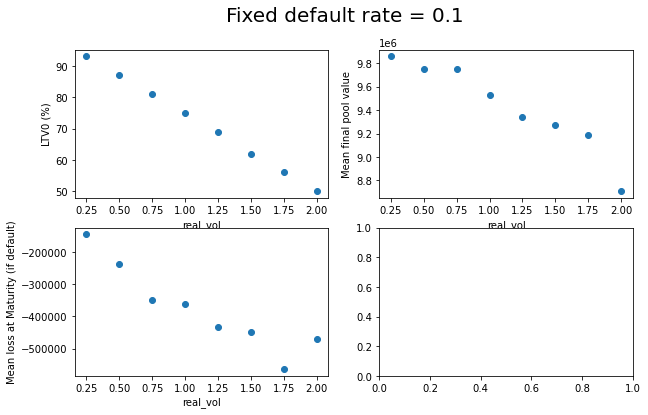

In [7]:
sheet_to_df_map = pd.read_excel('_temp.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
_temp = mdf[mdf['variable'] == 'default_at_maturity']
_temp = _temp[(_temp['mean']>0.15) &  (_temp['mean']<0.2) ]
grouped = _temp.sort_values(['mean']).groupby(['variable', 'real_vol']).head(1).reset_index()
grouped
grouped[['variable', 'real_vol', 'mean', 'LTV0']]
df2 =mdf[mdf['variable'] == 'pool_value'][['LTV0', 'real_vol', 'mean']]
df3 = mdf[mdf['variable'] == 'loss_at_maturity'][['LTV0', 'real_vol', 'mean']]
df1 = grouped[['variable', 'real_vol', 'mean', 'LTV0']]
pd.merge(grouped[['variable', 'real_vol', 'mean', 'LTV0']], mdf[mdf['variable'] == 'pool_value'], how = 'left', \
         on = ['real_vol', 'LTV0'])


df = pd.merge(pd.merge(df1,df2,on= ['real_vol', 'LTV0'],  suffixes=['_default','_pv']),\
              df3,on=['real_vol', 'LTV0'], suffixes=['','_loss'])
df
fig, axs = plt.subplots(2,2,figsize=(10,6))
fig.suptitle('Fixed default rate = 0.1', fontsize=20)
axs[0][0].scatter(df['real_vol'], df['LTV0'])
axs[0][0].set_xlabel('real_vol')
axs[0][0].set_ylabel('LTV0 (%)')
axs[0][1].scatter(df['real_vol'], df['mean_pv'])
axs[0][1].set_xlabel('real_vol')
axs[0][1].set_ylabel('Mean final pool value')
axs[1][0].scatter(df['real_vol'], df['mean'])
axs[1][0].set_xlabel('real_vol')
axs[1][0].set_ylabel('Mean loss at Maturity (if default)')
plt.savefig('./shared/Fixed_default_risk_17pct.png')
plt.show()

In [4]:
# np.arange(0,1.01,0.1)
# ['SM_factor_{}.csv'.format(int(i*100)) for i in np.arange(0,1.01,0.1)]

import pandas as pd
import sys
import os
file_list = ['SM_gr_vol_{}.csv'.format(round(gr*100)) for gr in  np.arange(-2, 2.01, 0.2)]
file_list1 =[round(int(x.split('.')[0].split('_')[-1])/20)/5 for x in file_list]
file_list1
writer = pd.ExcelWriter('Simulation_by_vol_gr_95.xlsx') # Arbitrary output name
_i =0
for csvfilename in file_list:
    df = pd.read_csv(csvfilename)
    df['gr'] =file_list1[_i]
    df.to_excel(writer,sheet_name=file_list[_i])
    _i+=1
writer.save()   

In [5]:

sheet_to_df_map = pd.read_excel('./Simulation_by_vol_gr_95.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
mdf.variable.unique()

array(['pool_value', 'pvtc', 'default_anytime', 'default_at_maturity',
       'IL_from_weight', 'IL_from_price', 'total_pnl', 'loss_at_default',
       'loss_at_maturity', 'mean_abs_wt_change', 'BuynHold',
       'BTC_wt_default', 'BTC_wt_final', 'pv_minus_bnh', 'bnh_default',
       'pv_minus_bnh_btc'], dtype=object)

pool_value
pv_minus_bnh
pv_minus_bnh_btc


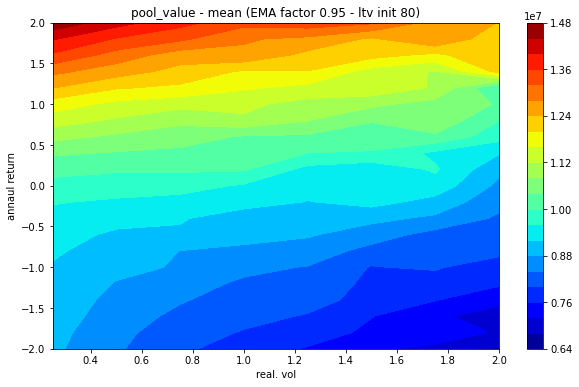

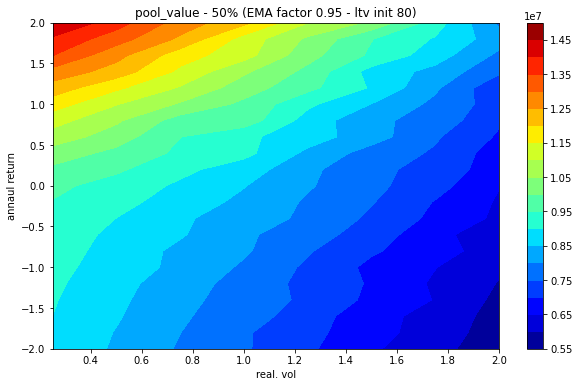

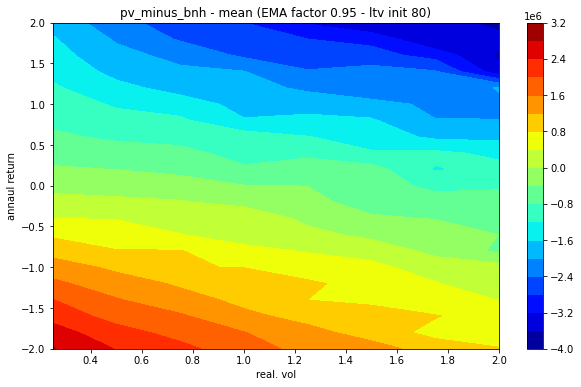

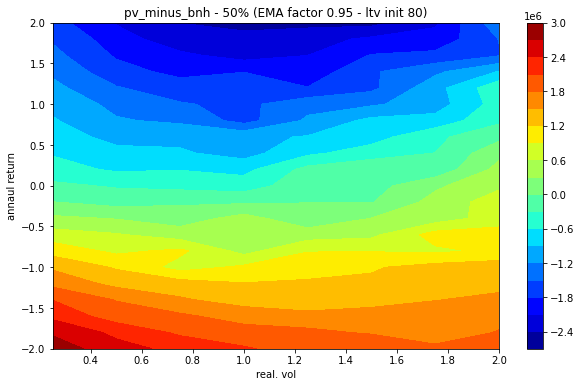

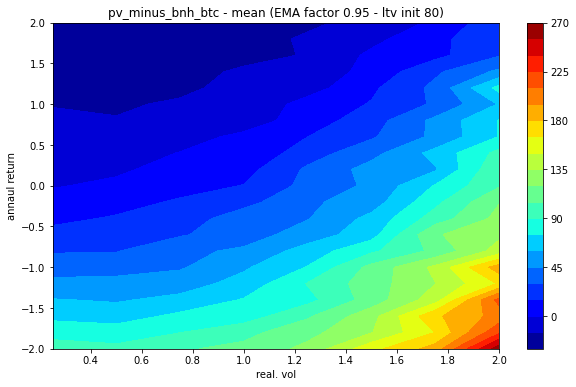

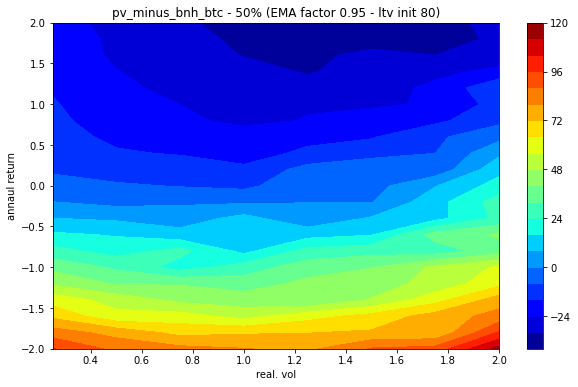

In [11]:

import matplotlib.backends.backend_pdf
from matplotlib import cm
sheet_to_df_map = pd.read_excel('./Simulation_by_vol_gr_95.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
pdf = matplotlib.backends.backend_pdf.PdfPages("output_95_ltv80.pdf")

#for _var in ['pool_value', 'pv_minus_bnh','default_at_maturity', 'bnh_default', 'IL_from_weight', 'IL_from_price', 'mean_abs_wt_change', 'pv_minus_bnh_btc']:
for _var in ['pool_value', 'pv_minus_bnh','pv_minus_bnh_btc']:

    print(_var)
    _df1 = mdf.loc[mdf.variable == _var].reset_index()
    _df1.head()
    #_df2 = mdf.loc[mdf.variable == 'BuynHold'].reset_index()

    vol_list = _df1['real_vol'].unique()
    gr_list = _df1['gr'].unique()
    _df1

    X,Y = np.meshgrid(vol_list,gr_list)
    zp = np.ndarray((vol_list.shape[0],gr_list.shape[0]))
    zp
    for tag in ['mean', '50%']:
        for x in range(0, len(vol_list)):
            for y in range(0, len(gr_list)):
                zp[x][y] = _df1.loc[(_df1.real_vol ==vol_list[x]) & (_df1.gr==gr_list[y])][tag]
        zp
        Z = zp.T

        #plt.figure(figsize=(14, 10))
        fig, axs = plt.subplots(1,1,figsize=(10,6))
        sp = axs.contourf(X, Y, Z, 20, cmap = 'jet')
        axs.set_xlabel('real. vol')
        axs.set_ylabel('annaul return')
        axs.set_title('{} - {} (EMA factor 0.95 - ltv init 80)'.format(_var, tag))
        fig.colorbar(sp)
        #plt.savefig('./{}_{}.png'.format(_var, tag))
        pdf.savefig(fig)
        
# _df1 = mdf.loc[mdf.variable == 'default_at_maturity'].reset_index()
# _df2 = mdf.loc[mdf.variable == 'bnh_default'].reset_index()
# _df1['default_diff'] = _df1['mean'].values - _df2['mean'].values
# vol_list = _df1['real_vol'].unique()
# gr_list = _df1['gr'].unique()

# X,Y = np.meshgrid(vol_list,gr_list)
# zp = np.ndarray((vol_list.shape[0],gr_list.shape[0]))

# tag = 'default_diff'
# for x in range(0, len(vol_list)):
#     for y in range(0, len(gr_list)):
#         zp[x][y] = _df1.loc[(_df1.real_vol ==vol_list[x]) & (_df1.gr==gr_list[y])][tag]
# zp
# Z = zp.T
#     #plt.figure(figsize=(14, 10))
# fig, axs = plt.subplots(1,1,figsize=(10,6))
# sp = axs.contourf(X, Y, Z, 20, cmap = 'jet')
# axs.set_xlabel('real. vol')
# axs.set_ylabel('annaul return')
# axs.set_title('{} - {} (EMA factor 0.95 - ltv init 75)'.format(tag,'mean'))
# fig.colorbar(sp)
# #plt.savefig('./{}_{}.png'.format(_var, tag))
# pdf.savefig(fig)

pdf.close()

pool_value
pv_minus_bnh
default_at_maturity
bnh_default
IL_from_weight
IL_from_price
mean_abs_wt_change


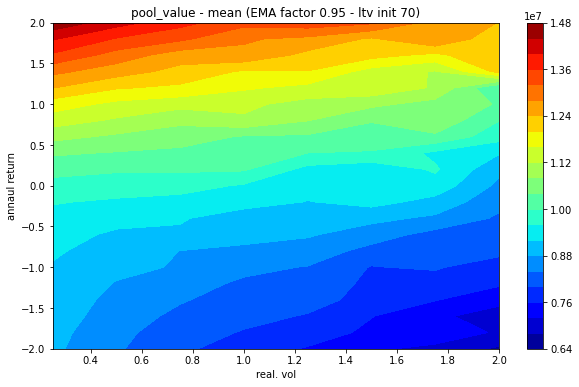

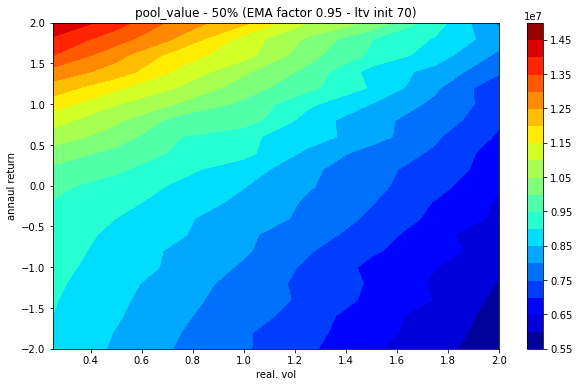

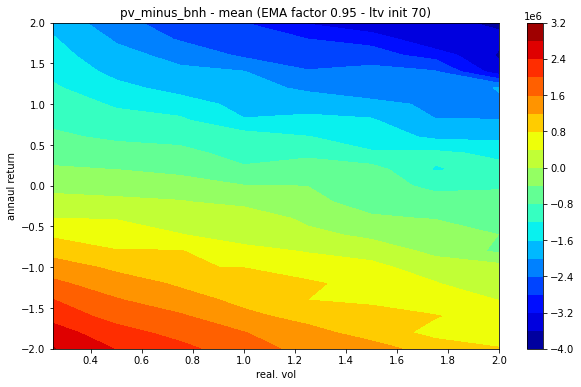

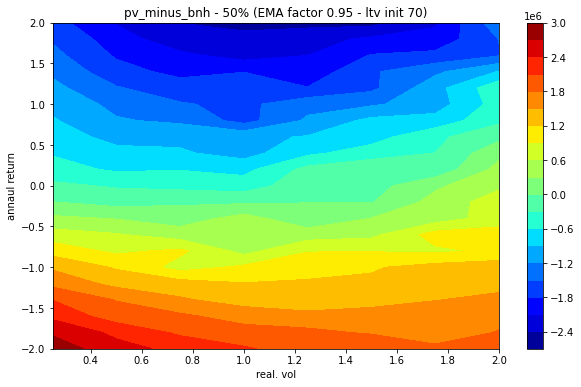

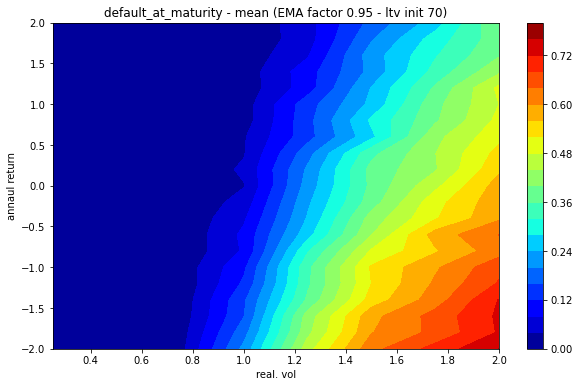

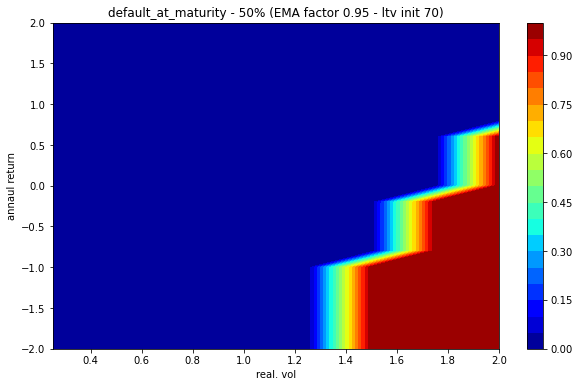

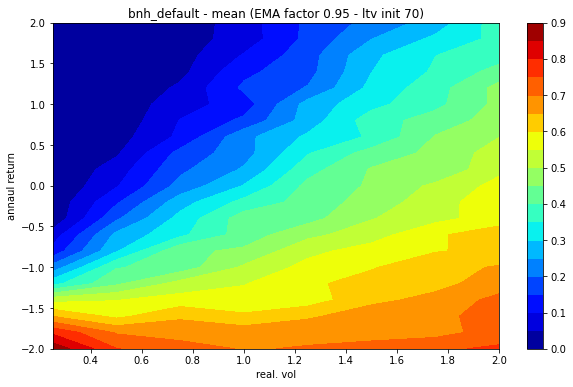

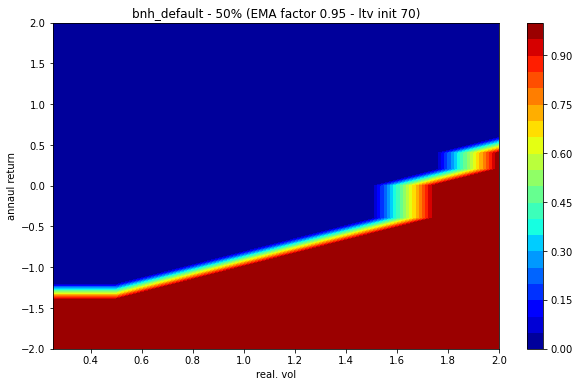

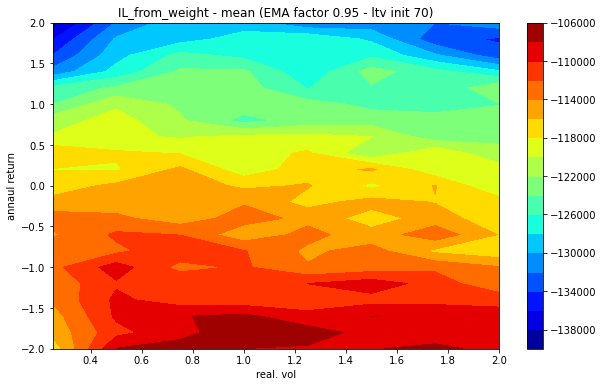

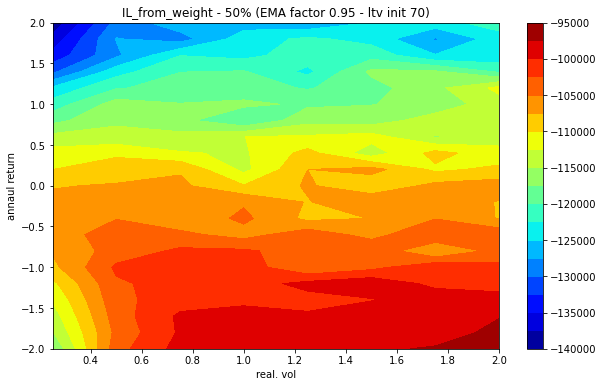

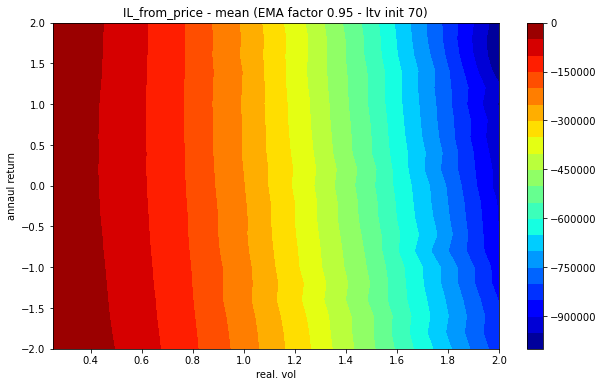

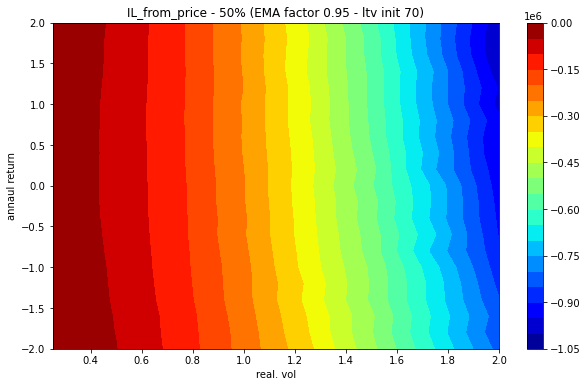

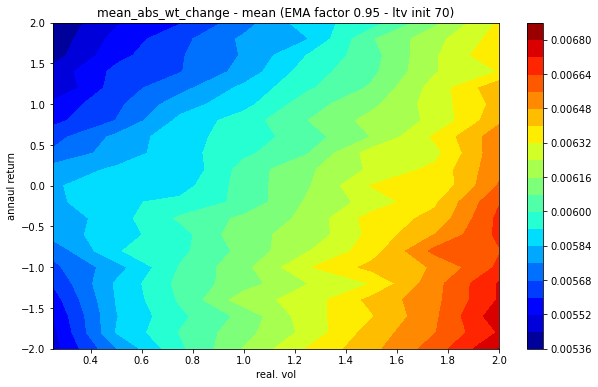

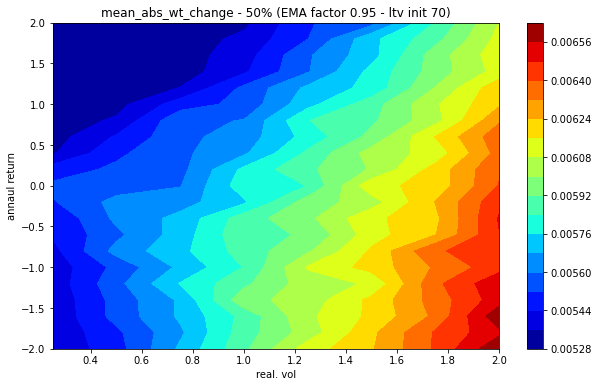

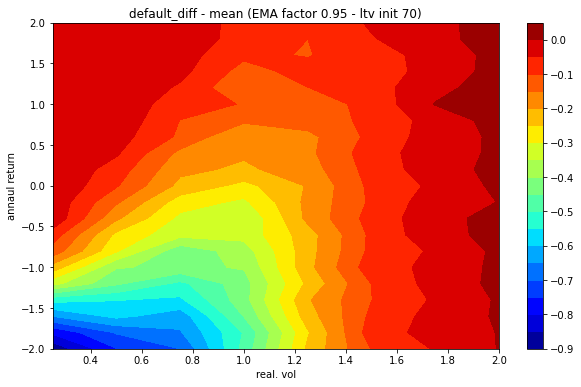

In [10]:
import matplotlib.backends.backend_pdf
from matplotlib import cm
sheet_to_df_map = pd.read_excel('./Simulation_by_vol_gr_95_ltv70.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
mdf.head()
pdf = matplotlib.backends.backend_pdf.PdfPages("output_95_ltv70.pdf")

for _var in ['pool_value', 'pv_minus_bnh','default_at_maturity', 'bnh_default', 'IL_from_weight', 'IL_from_price', 'mean_abs_wt_change']:
    print(_var)
    _df1 = mdf.loc[mdf.variable == _var].reset_index()
    _df1.head()
    #_df2 = mdf.loc[mdf.variable == 'BuynHold'].reset_index()

    vol_list = _df1['real_vol'].unique()
    gr_list = _df1['gr'].unique()
    _df1

    X,Y = np.meshgrid(vol_list,gr_list)
    zp = np.ndarray((vol_list.shape[0],gr_list.shape[0]))
    zp
    for tag in ['mean','50%']:
        for x in range(0, len(vol_list)):
            for y in range(0, len(gr_list)):
                zp[x][y] = _df1.loc[(_df1.real_vol ==vol_list[x]) & (_df1.gr==gr_list[y])][tag]
        zp
        Z = zp.T

        #plt.figure(figsize=(14, 10))
        fig, axs = plt.subplots(1,1,figsize=(10,6))
        sp = axs.contourf(X, Y, Z, 20, cmap = 'jet')
        axs.set_xlabel('real. vol')
        axs.set_ylabel('annaul return')
        axs.set_title('{} - {} (EMA factor 0.95 - ltv init 70)'.format(_var, tag))
        fig.colorbar(sp)
        #plt.savefig('./{}_{}.png'.format(_var, tag))
        pdf.savefig(fig)
        
_df1 = mdf.loc[mdf.variable == 'default_at_maturity'].reset_index()
_df2 = mdf.loc[mdf.variable == 'bnh_default'].reset_index()
_df1['default_diff'] = _df1['mean'].values - _df2['mean'].values
vol_list = _df1['real_vol'].unique()
gr_list = _df1['gr'].unique()

X,Y = np.meshgrid(vol_list,gr_list)
zp = np.ndarray((vol_list.shape[0],gr_list.shape[0]))

tag = 'default_diff'
for x in range(0, len(vol_list)):
    for y in range(0, len(gr_list)):
        zp[x][y] = _df1.loc[(_df1.real_vol ==vol_list[x]) & (_df1.gr==gr_list[y])][tag]
zp
Z = zp.T
    #plt.figure(figsize=(14, 10))
fig, axs = plt.subplots(1,1,figsize=(10,6))
sp = axs.contourf(X, Y, Z, 20, cmap = 'jet')
axs.set_xlabel('real. vol')
axs.set_ylabel('annaul return')
axs.set_title('{} - {} (EMA factor 0.95 - ltv init 70)'.format(tag,'mean'))
fig.colorbar(sp)
#plt.savefig('./{}_{}.png'.format(_var, tag))
pdf.savefig(fig)

pdf.close()

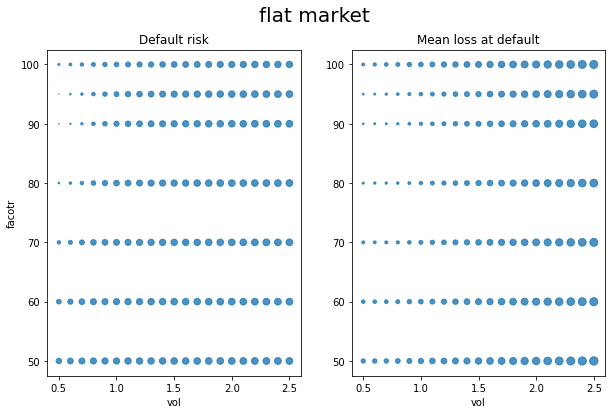

In [32]:

sheet_to_df_map = pd.read_excel('./shared/Simulation_by_vol_flat.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
factor = [int(x.split("_")[2]) for x in sheet_to_df_map.keys()]
mdf['factor'] = np.repeat(factor, 189)

mdf.head()

_df1 = mdf.loc[mdf.variable == 'default']
_df2 = mdf.loc[mdf.variable == 'loss_at_default']

fig, axs = plt.subplots(1,2,figsize=(10,6))
fig.suptitle('flat market ', fontsize=20)
axs[0].scatter(_df1['real_vol'], _df1['factor'], s = _df1['mean']*50, alpha=0.8)
axs[0].set_title("Default risk")
axs[0].set_ylabel('facotr')
axs[0].set_xlabel('vol')
axs[1].scatter(_df2['real_vol'], _df2['factor'], s = -_df2['mean']/5e4, alpha=0.8)
axs[1].set_title("Mean loss at default")
axs[1].set_xlabel('vol')
plt.savefig('./shared/default_risk_flat.png')
plt.show()

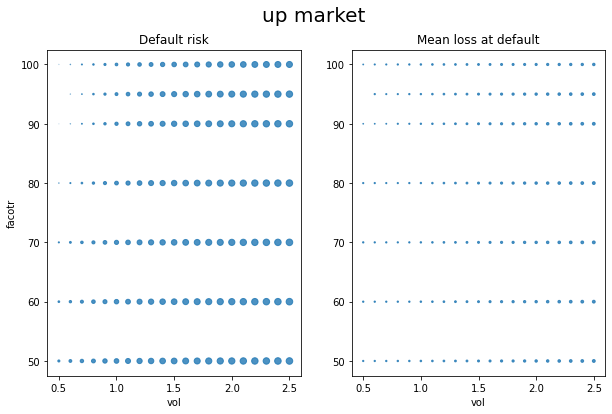

In [31]:

sheet_to_df_map = pd.read_excel('./shared/Simulation_by_vol_up.xlsx', sheet_name=None)
sheet_to_df_map

mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
# mdf.shape
# factor = [int(x.split("_")[2]) for x in sheet_to_df_map.keys()]
# # mdf.shape[0]/7
# mdf['factor'] = np.repeat(factor, 230)

# mdf.head()

_df1 = mdf.loc[mdf.variable == 'default']
_df2 = mdf.loc[mdf.variable == 'loss_at_default']

fig, axs = plt.subplots(1,2,figsize=(10,6))
fig.suptitle('up market ', fontsize=20)
axs[0].scatter(_df1['real_vol'], _df1['factor'], s = _df1['mean']*50, alpha=0.8)
axs[0].set_title("Default risk")
axs[0].set_ylabel('facotr')
axs[0].set_xlabel('vol')
axs[1].scatter(_df2['real_vol'], _df2['factor'], s = -_df2['mean']/5e4, alpha=0.8)
axs[1].set_title("Mean loss at default")
axs[1].set_xlabel('vol')
plt.savefig('./shared/default_risk_up.png')
plt.show()

In [7]:
# np.arange(0,1.01,0.1)
# ['SM_factor_{}.csv'.format(int(i*100)) for i in np.arange(0,1.01,0.1)]

import pandas as pd
import sys
import os
file_list= ['SM_slope_{}.csv'.format(int(i*100)) for i in np.arange(0.7,0.99,0.05)]
file_list1= ['SM_slope_{}.csv'.format(int(i*100)) for i in np.arange(0.7,0.99,0.05)]
file_list1
# #file_list1
# #file_list.extend(['SM_100.csv'])

writer = pd.ExcelWriter('Simulation_by_slope.xlsx') # Arbitrary output name
_i =0
for csvfilename in file_list:
    df = pd.read_csv(csvfilename)
    df['factor'] =file_list1[_i].split('.')[0].split("_")[2]
    df.to_excel(writer,sheet_name='factor'+ file_list1[_i].split('.')[0].split("_")[2])
    _i+=1
writer.save()   